<a href="https://colab.research.google.com/github/LorenzoSansone/Data-Intensive/blob/main/Progetto_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsione del prezzo delle case nel King Country, USA
Progetto di Programmazione di Applicazioni Data Intensive a.a. 2021/22

Realizzato da: Lorenzo Sansone

Si intende predire il prezzo delle case (variabile continua) nel King Country( USA )attraverso la regressione. E' stato utilizzato il dataset "House Sales in King County, USA" (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?datasetId=128&sortBy=voteCount). I dati sono stati raccolti tra le vendite delle case effettuate da maggio 2014 a maggio 2015.

# Descrizione dei parametri
- id: identificatore univoco
- date: data della vendita
- bedrooms: numero di camere da letto
- bathrooms: numero di bagni, dove .5 per un bagno senza doccia
- sqft_living: la metratura dello spazio abitativo interno dell'appartamento. 
- sqft_lot: la metratura del terreno
- floors: numero di piani
- waterfront: indica se è sul lungo mare
- view: indice da 0 a 4 che precisa la qualità della vista
- condition: indice da 1 a 5 che precisa le condizioni della casa
- grade: un indice da 1 a 13, dove 1-3 indica un basso valore di qualità della costruzione e del design, 7 è un livello medio della qualità della costruzione e del design e 11-13 è un valore alto della qualità della costruzione e del design
- sqft_above: metratura interna che sono situati sopra il piano terra
- sqft_basement: metratura interna che si trova sotto il livello terreno
- yr_built: anno in cui è stata iniziata la costruzione
- yr_renovated: anno di costruzioned in cui è stata ristrutturata
- zipcode: zipcode dell'area
- lat: latitudine
- long: longitudine
- sqft_living15: la metratura dello spazio abitativo abitativo interno per 1 15 vicni più prossimi.
-sqft_lot15: la metratura dei lotti di terreno dei 15 vicini più prossimi
- **price: prezzo della casa**
  - Si vuole predire il prezzo della casa in funzione delle altre


# Importazione delle librerie


In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
%matplotlib inline

#Caricamento dei dati

In [365]:
import os.path
#if not os.path.exists("kc_house_data.csv"):
#    from urllib.request import urlretrieve
#    urlretrieve("https://raw.githubusercontent.com/LorenzoSansone/Data-Intensive/main/kc_house_data.csv", "kc_house_data.csv")
dataset = pd.read_csv('kc_house_data.csv')


In [366]:
dataset.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [367]:
dataset.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


#Analisi dei dati preliminare

In [368]:
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


- Le istanze totali sono 21613.
- Sono presenti 21 feature compreso il prezzo (**price**) che è la variabile da predire
- Non ci sono tipi di dati object rilevanti quindi non saranno necessarie utilizzare tecnince per gestire quest'ultime. Infatti **data** non è utile alla regressione quindi verrà eliminata

Nella tabella si mostrano i percentili, la media e le deviazioni standard delle feature

In [369]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Rimozione nulli,mancanti e di eventuali righe duplicate

In [370]:
dataset.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [371]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [372]:
#arr = dataset.duplicated()
#print(arr[4348])
#print(np.where(dataset.duplicated() == True))
#print(dataset.duplicated().sum())
#print(dataset.iloc[3947])
#print(dataset.iloc[4348])
#print(dataset.iloc[14969])
#print(dataset.iloc[20037])
#print(dataset.iloc[20507])


Non ci sono valori nulli e mancanti

Da subito due feature del dataset risultano insignificanti per l'analisi e per la regressione successiva. In particolare si eliminano **id** e **data**

In [373]:
dataset.drop(columns=["id", "date"], inplace=True);
dataset.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


Notare che ci sono alcune case in cui non sono presenti **bedrooms** o **bathrooms**. Dato che sono considerate come casi rari ed isolati è stato deciso di elimarle dal dataset perchè poco rilevanti

In [374]:
for x in np.where(dataset["bedrooms"] == 0):
  print(dataset.iloc[x]["bedrooms"])
 

875      0
3119     0
3467     0
4868     0
6994     0
8477     0
8484     0
9773     0
9854     0
12653    0
14423    0
18379    0
19452    0
Name: bedrooms, dtype: int64


In [375]:
for x in np.where(dataset["bathrooms"] == 0):
  print(dataset.iloc[x]["bathrooms"])

875      0.0
1149     0.0
3119     0.0
5832     0.0
6994     0.0
9773     0.0
9854     0.0
10481    0.0
14423    0.0
19452    0.0
Name: bathrooms, dtype: float64


In totale si eliminano 16 istanze

In [376]:
print(dataset.shape)
dataset.drop(dataset[(dataset['bedrooms'] == 0) | (dataset['bathrooms'] == 0)].index, inplace=True)
print(dataset.shape)

(21613, 19)
(21597, 19)


Risultano significative 21597 righe e 19 colonne

# Correlazione
In seguito viene mostrata la matrice di correlazione tra tutte le variabili. Più il valore è vicino ad 1 più saranno correlate tra di loro.
In seguito alla tabella sarà mostrato un grafico che illustra la correlazione tramite i colori. Più la correlazione sarà forte più scuro sarà il colore blu.

Per calcolare la correlazione viene utilizzato il *coefficiente di correlazione di Pearson*. 
- Date due variabili casuali $X$ e $Y$, il coefficiente è dato dal rapporto tra la loro covarianza $\sigma_{XY}$ e il prodotto delle deviazioni standard $\sigma_X$ e $\sigma_Y$

$$ \rho(X,Y) = \frac{\sigma_{XY}}{\sigma_X\sigma_Y} $$
- Data una serie di campioni $(x_1,y_1),\ldots,(x_n,y_n)$ delle due variabili con medie $\mu_X$ e $\mu_Y$, la correlazione si può stimare come
$$ \frac{\sum_{i=1}^n{(x_i-\mu_X)\cdot(y_i-\mu_Y)}}{n\cdot\sigma_X\cdot\sigma_Y} $$


Il coefficiente di correlazione varia tra 1 e -1:
- 1: la correlazione tra due variabili è diretta e massima
- 0: non c'è correlazione 
- -1: la correlazione tra le due variabili è inversa e massima

Però non sarà implementata un metodo da zero ma verrà sfruttato il metodo **corr** per calcolare la matrice di correlazione.

In [377]:
dataset.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308794,0.525905,0.701909,0.089882,0.256814,0.266437,0.397318,0.036025,0.667922,0.605371,0.323776,0.053984,0.126415,-0.053437,0.306777,0.022092,0.585247,0.082837
bedrooms,0.308794,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525905,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701909,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089882,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256814,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,0.266437,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.397318,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,0.036025,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.667922,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981


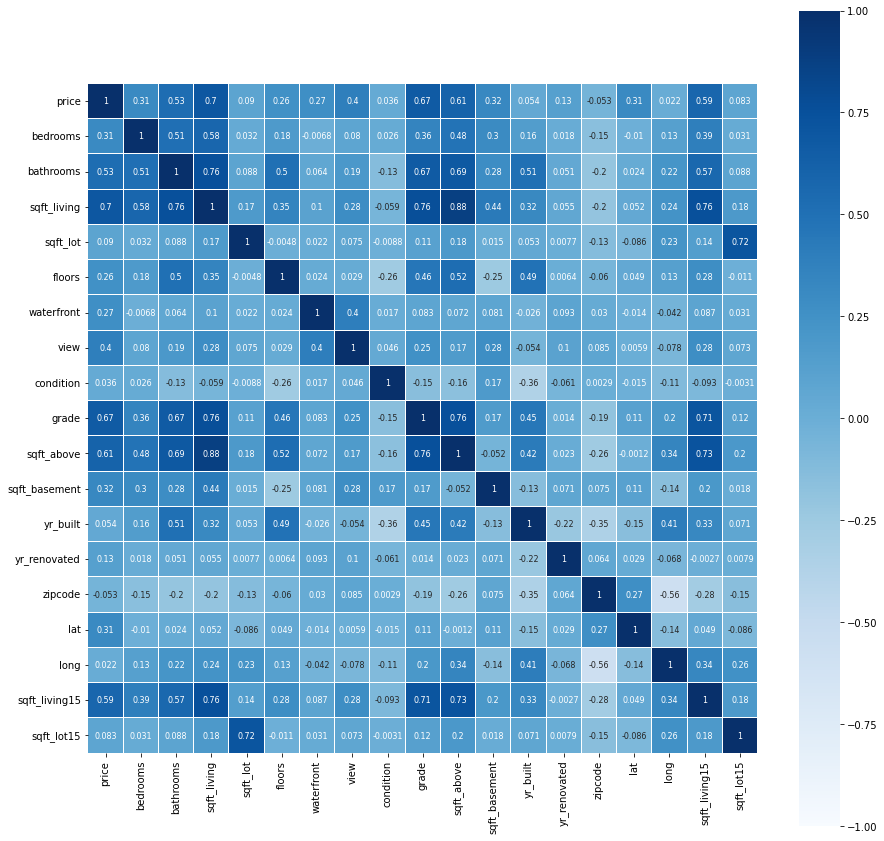

In [378]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dataset.corr(), 
            cmap='Blues', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True, ax = ax);


E' utile osservare come le variabili più correlate al prezzo sono **sqtf_living**, **grade** e **sqtf_above**. Mentre quelle meno correlate sono **sqtf_lot15**, **condition** e **sqtf_lot**. Nelle coppie di variabili (eslcuso il prezzo) in cui si ha una forte correlazione si potrebbe eliminarne una delle due. Però questa decisione è preferibile prenderla durante la creazione del modello perchè se si usasse la regressione Lasso si avrebbe un altro strumento per capire se è conveniente applicare questa operazione

Di seguito viene riportata la lista delle variabili più correlate rispetto al prezzo

In [379]:
threshold = 0.5
num_corr = dataset.corr()['price'][1:] # tolgo il prezzo
features_list = num_corr[abs(num_corr) > threshold].sort_values(ascending=False) #Scelgo una soglia
print("In seguito viene mostrata la lista delle {} feature più correlate con il prezzo:\n{}".format(len(features_list), features_list))

In seguito viene mostrata la lista delle 5 feature più correlate con il prezzo:
sqft_living      0.701909
grade            0.667922
sqft_above       0.605371
sqft_living15    0.585247
bathrooms        0.525905
Name: price, dtype: float64


#Analisi dei dati avanzata

Si stampano le distribuzione delle variabili con singoli grafici

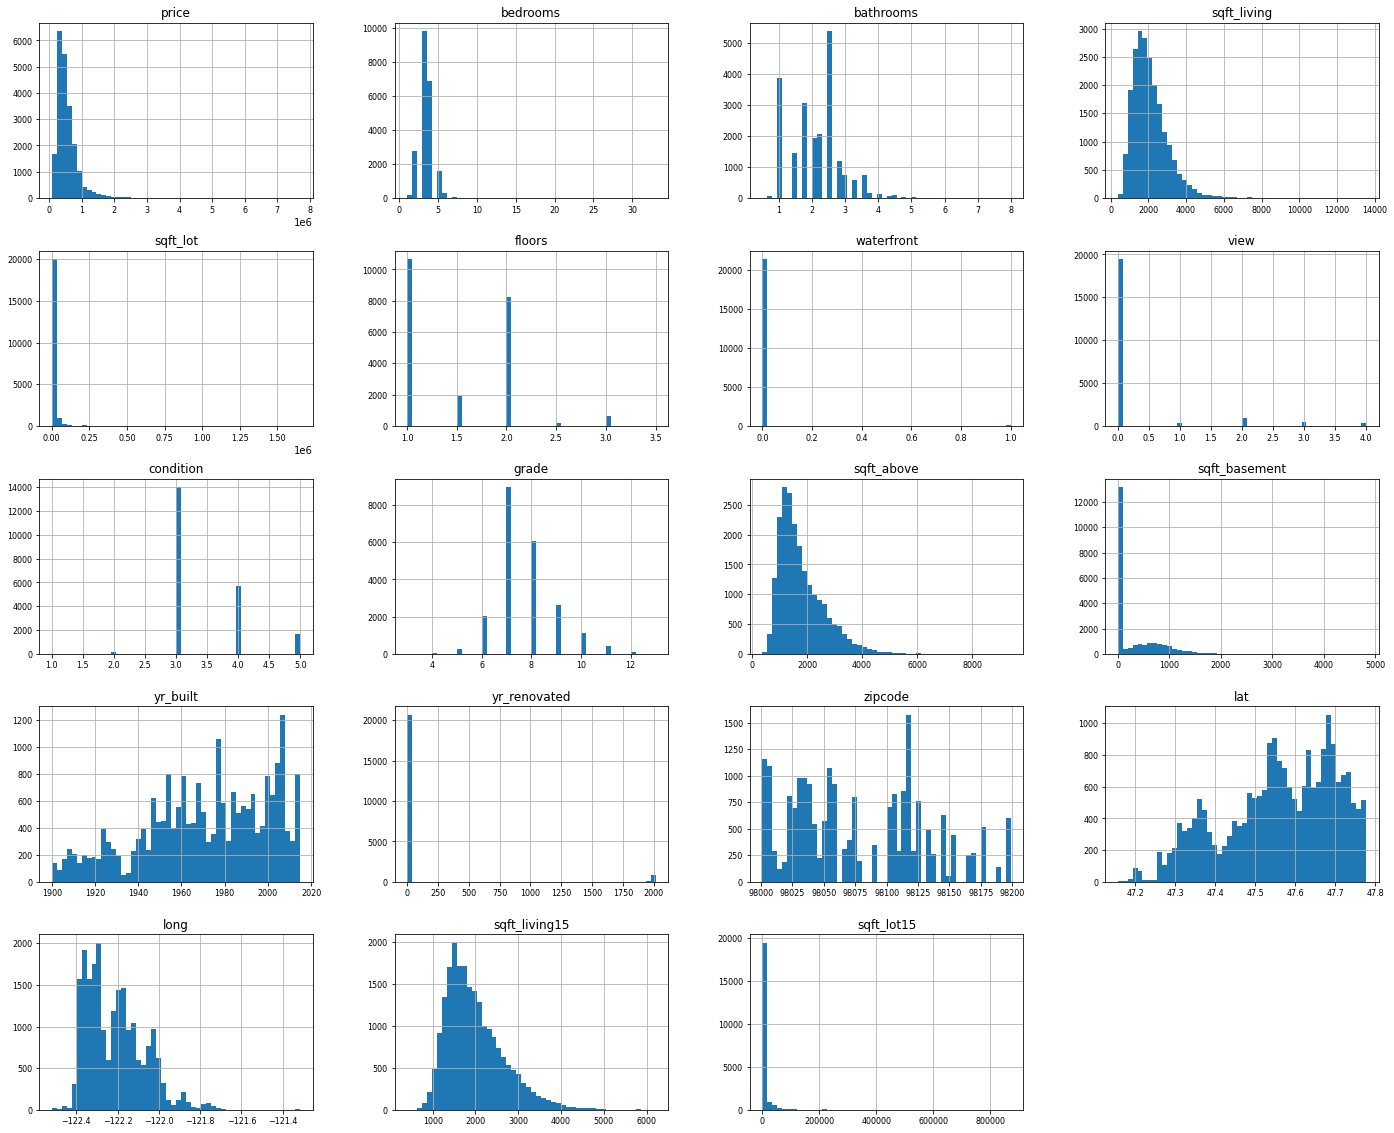

In [380]:
dataset.hist(figsize=(24, 20), bins=50, xlabelsize=8, ylabelsize=8); 

Si riporta maggiore attenzione sull'istogramma del prezzo che dimostra come la sua distribuzione è spostata verso un gruppo ristretto di valori. Però non mancano campioni fuori dalla media che rappresentano case molto più costose del normale.
- Valore medio: 5.4e+05	
- Massimo:	7.7e+06
- Minimo: 7.5e+04	

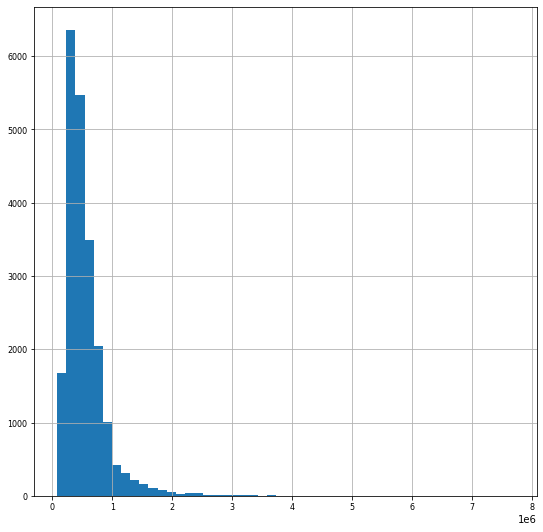

In [381]:
plt.figure(figsize=(9, 8))
#sns.distplot(dataset['price'], color='b', bins=100, hist_kws={'alpha': 0.4});
dataset["price"].hist(figsize=(9, 9), bins=50, xlabelsize=8, ylabelsize=8); 

Andamento delle variabili in confronto al prezzo utilizzando grafici a dispersione

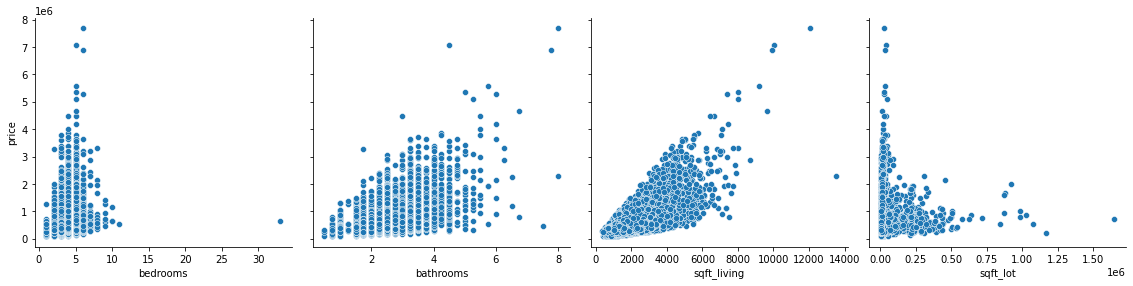

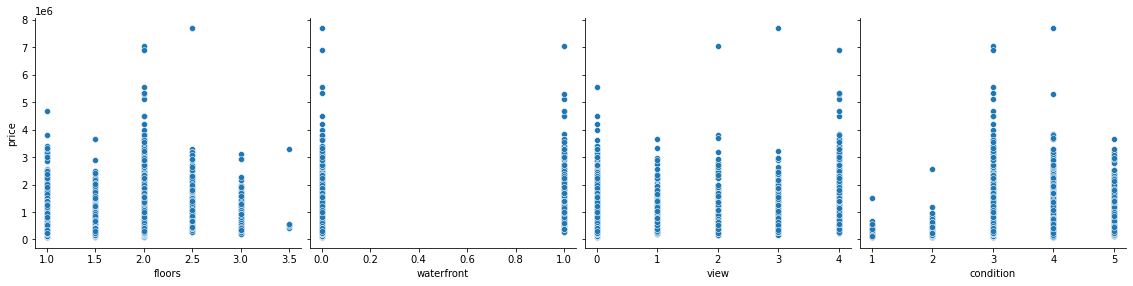

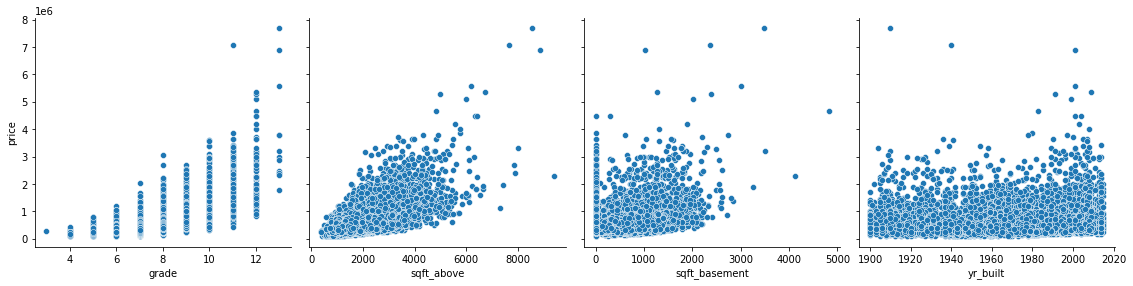

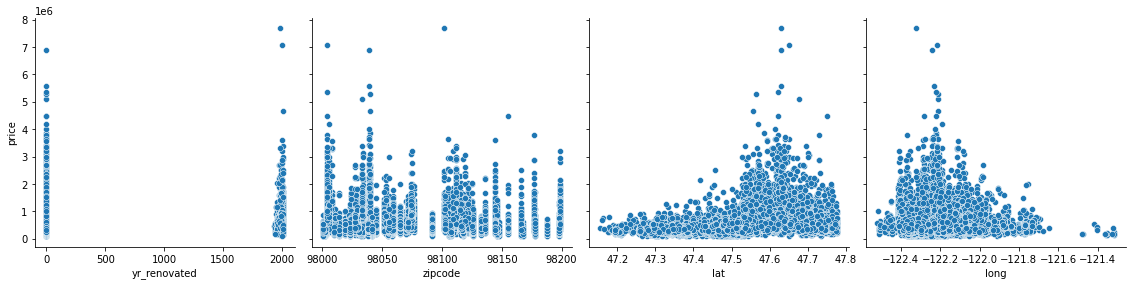

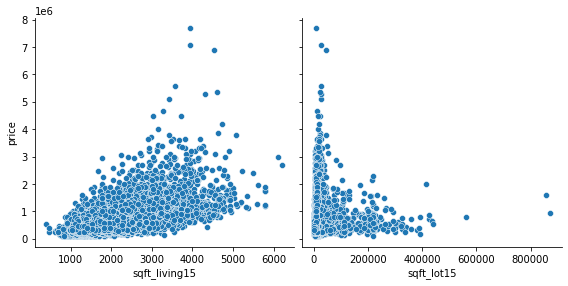

In [382]:
for i in range(1, len(dataset.columns)+2, 4):
    sns.pairplot(data=dataset,
                x_vars=dataset.columns[i:i+4],
                y_vars=['price'],height= 4)


**Zip code** può essere rimosso perchè oltre a non avere una forte correlazione con **price** è anche superflua perchè la locazione geografica potrebbe essere ricavata da **lat** e **long**. **yr_renovated** e **waterfront** hanno bisogno di uno studio più approfondito per capire meglio la distribuzione dei dati. Si riporta l'attenzione su alcune feature con grafici boxplot.

In [383]:
dataset.drop(columns=["zipcode"], inplace=True);

In [384]:
dataset.shape

(21597, 18)

In [385]:
#dataset.boxplot(figsize=(25, 8),column="price", by="sqft_living",showmeans=True,rot=90);
#print(dataset.shape)

#import numpy as np
#from scipy import stats
#dataset= dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]

#print(dataset.shape)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


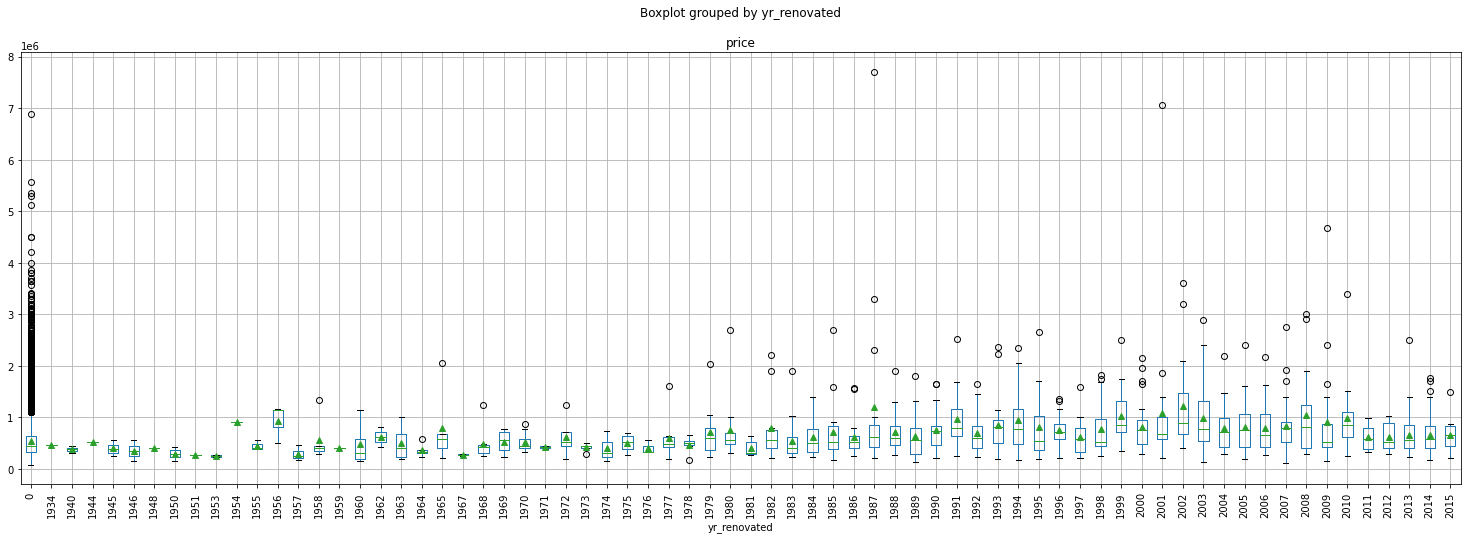

In [386]:
dataset.boxplot(figsize=(25, 8),column="price", by="yr_renovated",showmeans=True,rot=90);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


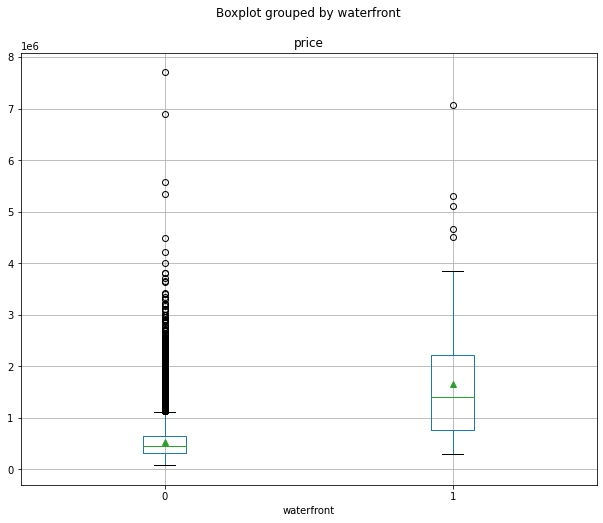

In [387]:
dataset.boxplot(figsize=(10, 8),column="price", by="waterfront",showmeans=True);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


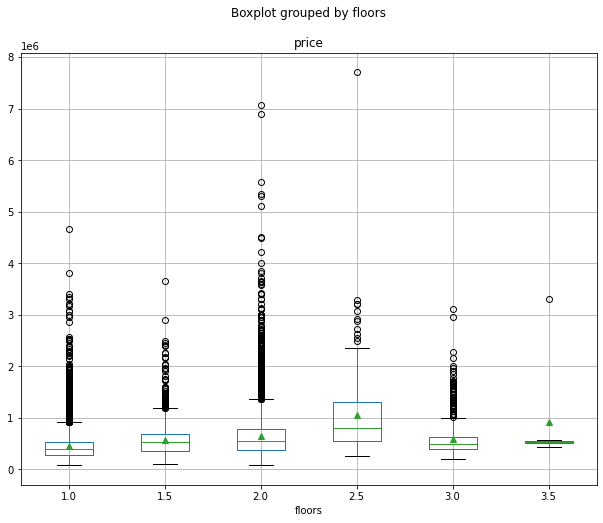

In [388]:
dataset.boxplot(figsize=(10, 8),column="price", by="floors",showmeans=True);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


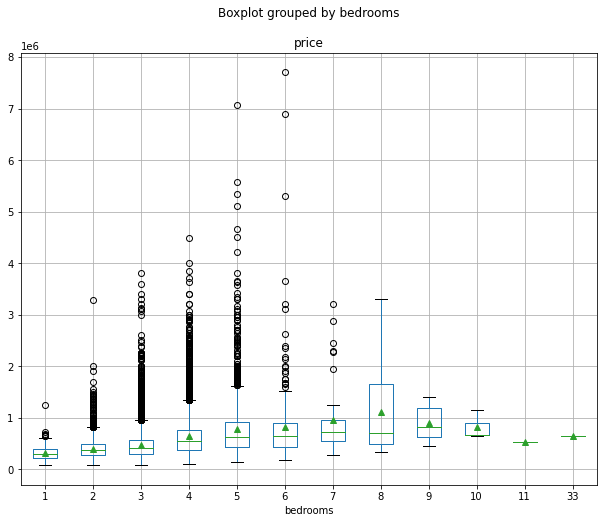

In [389]:
dataset.boxplot(figsize=(10, 8),column="price", by="bedrooms",showmeans=True);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


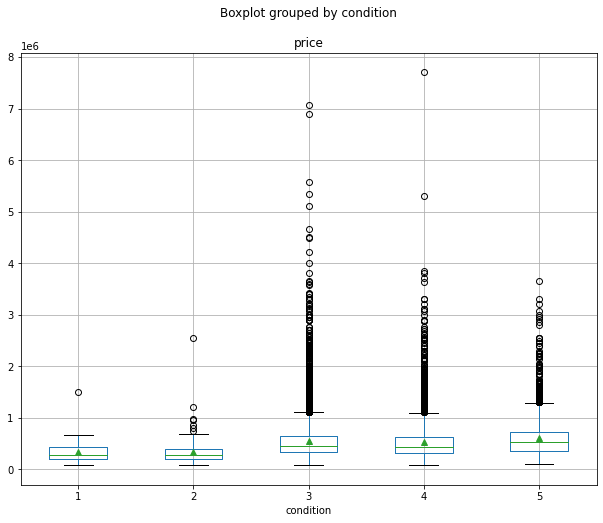

In [390]:
dataset.boxplot(figsize=(10, 8),column="price", by="condition",showmeans=True);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


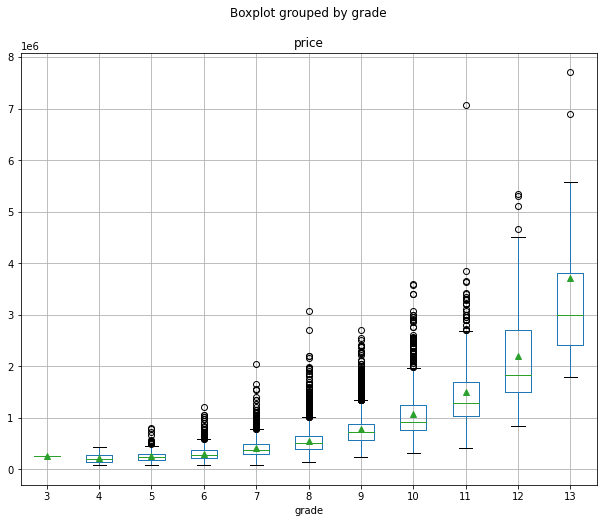

In [391]:
dataset.boxplot(figsize=(10, 8),column="price", by="grade",showmeans=True);

Dai grafici si nota particolarmente che esiste una casa con 33 camere venduta ad un prezzo esiguo. Ciò comporta un caso particolare di cui si potrebbe fare a meno quindi l'istanza viene eliminata.

In [392]:
print(dataset.shape)
dataset.drop(dataset[(dataset['bedrooms'] == 33)].index, inplace=True)
print(dataset.shape)

(21597, 18)
(21596, 18)


# Standardizzazione dei dati

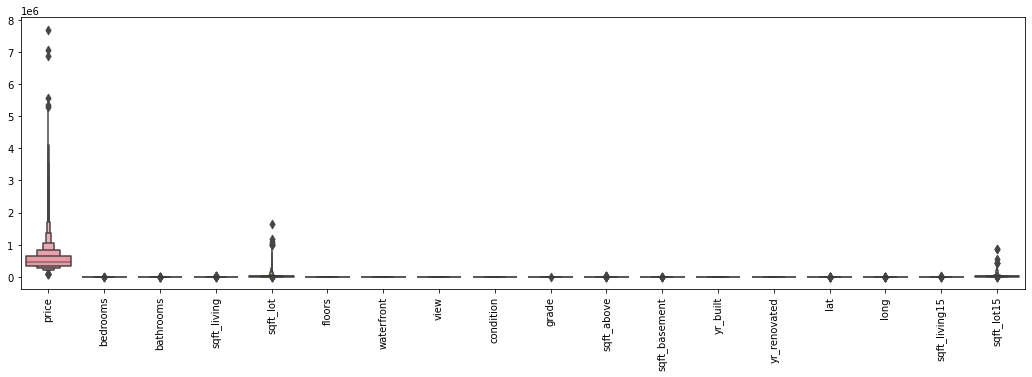

In [393]:
def boxplot_features(dataset):
  plt.figure(figsize=(18,5))
  sns.boxenplot(data = dataset)
  plt.xticks(rotation=90)
  plt.show()
boxplot_features(dataset)

Notare come i valori di **price** sono molto più elevati delle altre variabili. Per un maggiore approfondimento è necessario togliere **price** per studiare meglio il resto.

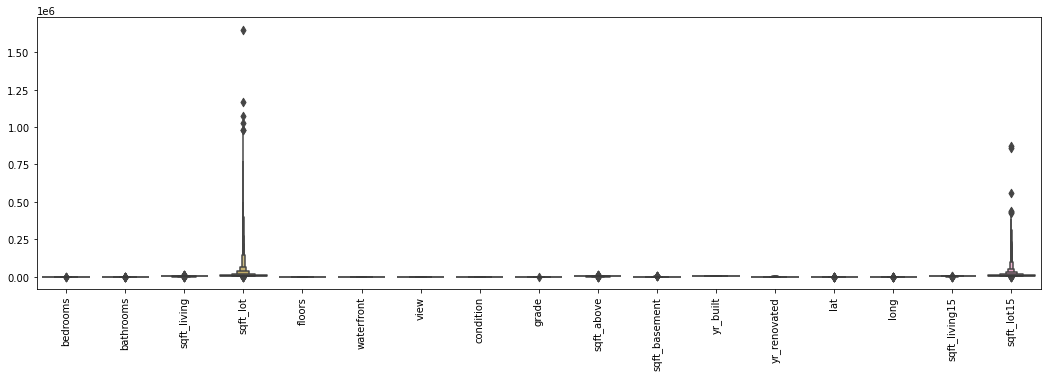

In [394]:
dataset1 = dataset.drop(columns=["price"], inplace=False);
boxplot_features(dataset1)

Si nota che la scala di **sqft_lot** e  **sqft_lot15** è elevata rispetto a quelle delle altre variabili quindi si procede come fatto in precedenza



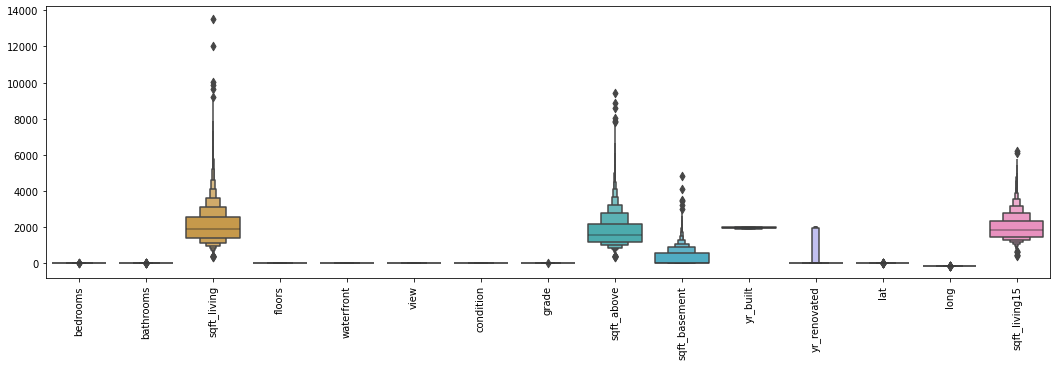

In [395]:
dataset1 = dataset.drop(columns=["price","sqft_lot","sqft_lot15"], inplace=False);
boxplot_features(dataset1)

Si conclude che le varie feature hanno scale diverse quindi sarà necessaria applicare la **standardizazzione**. Attraverso quest'ultimo procedimento si hanno scale più sensate. 

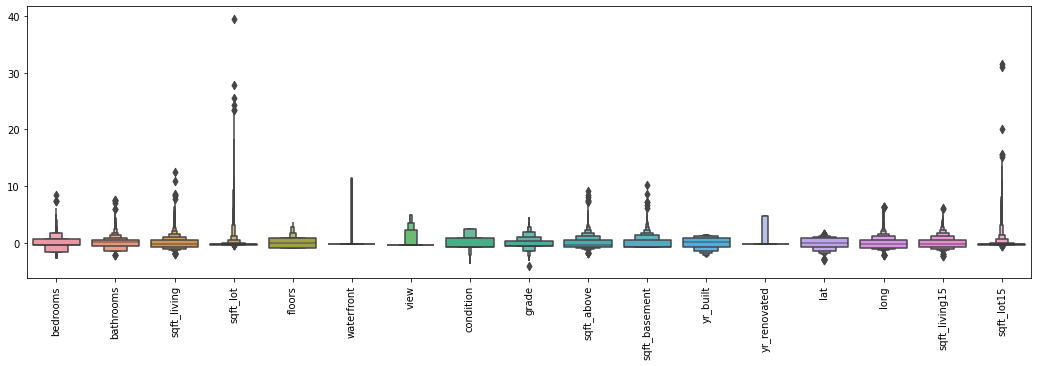

In [396]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X=dataset.drop(["price"],axis=1)

features = list(X.columns)
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=features)   

boxplot_features(X_std)

#Criteri per modelli regressione

**Misure ulili per i modelli**

Per capire la qualità dei modelli che verranno utilizzati si usano principalemente 3 misure:
- Errore Quadratico Medio, utilizzato per individuare il modello migliore
$$ \mathrm{MSE} = \frac{1}{m}\sum_{i=1}^n\left(h(\mathbf{x}_i)-y_i\right)^2 $$
- Errore Relativo, che misura intuitivamente di quanto il modello si sbaglia in percentuale rispetto al valore reale
$$ \mathrm{errore} = \frac{1}{m}\sum_{i=1}^m\left\vert\frac{h(\mathbf{x}_i)-y_i}{y_i}\right\vert $$
- _Coefficiente di determinazione_ $R^2$ è una misura che esprime intuitivamente quanto il modello catturi la variabilità presente nei dati ($\bar{y}$ = media di $Y$)
$$ R^2 = \frac{\sum_{i=1}^m{\left(y_i-\hat{y}_i\right)^2}}{\sum_{i=1}^m{\left(y_i-\bar{y}\right)^2}} $$
  - 1 indica che il modello descrive perfettamente i dati
  - 0 indice che non c'è alcuna relazoine tra il modello e dati




In [397]:
from sklearn.metrics import mean_squared_error

def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def print_eval(X, y, model):
    print("   Mean squared error: {:.5}".format(mean_squared_error(model.predict(X), y)))
    print("       Relative error: {:.5%}".format(relative_error(model.predict(X), y)))
    print("R-squared coefficient: {:.5}".format(model.score(X, y)))

**Metodo Hold Out**


Con il metodo hold out si divide i dati a disposizione in due sottoinsimi secondo una proporzione fissata. Il dataset viene diviso in training set e validation set con una proporzione 70-30.
- **training set** è utilizzato per addestrare il modello di regressione, minimizzando l'errore su di esso.
- **validation set** è usato dopo l'addestramento per verificare l'errore del modello su dati non ancora noti.

Se **l'errore** sul validation è simile a quello sul training allore si assume che il modello abbia generalizzato bene.

#Modello di regressione lineare univariata

Dato che c'è una correlazione non indifferente tra **price** e **sqft_living** si può incominiciare a costruire un modello con una sola variabile indipendente.

Per la ricerca del modello viene utilizzata la funzione d'errore:
 $$ \mathrm{E(\alpha,\beta)} = \frac{1}{m}\sum_{i=1}^n\left(\alpha \cdot \mathbf{x}_i + \beta-y_i\right)^2 $$

Creazione del training set e del validation set tramite metodo **Hold Out**

In [398]:
from sklearn.model_selection import train_test_split

y = dataset["price"]
X = dataset[["sqft_living"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

In [399]:
print(X_train)

       sqft_living
10822         2060
8653          1180
13704         2200
7184          2390
14147         1900
...            ...
11976         2230
21592         1190
5395          1530
860            380
15809         2755

[14397 rows x 1 columns]


In [400]:
rlu = Pipeline([  
    ("scale",  StandardScaler()),
    ("linreg", LinearRegression())
])
rlu.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('linreg', LinearRegression())])

In [401]:
rlu.named_steps["linreg"].coef_

array([257162.35750761])

Validazione del modello sul training set

In [402]:
print_eval(X_train, y_train, rlu)

   Mean squared error: 6.8581e+10
       Relative error: 33.62531%
R-squared coefficient: 0.49091


Validazione del modello sul validation set

In [403]:
print_eval(X_val, y_val, rlu)

   Mean squared error: 6.7994e+10
       Relative error: 33.32624%
R-squared coefficient: 0.49602


Si nota che l'errore sul validation set non è molto diverso da quello ottenuto sul training set ma il modello non cattura bene i dati dato che viene utilizzata una sola variabile. Di seguito si mostra un metodo per graficare il modello trovato sui dati a disposizione

In [404]:
def plot_model_on_data(x, y, model=None, xlabel_str = "", ylabel_str = ""):
    plt.scatter(x, y)
    if model is not None:
        xlim, ylim = plt.gca().get_xlim(), plt.gca().get_ylim()
        line_x = np.linspace(xlim[0], xlim[1], 100)
        line_y = model.predict(line_x[:, None])
        plt.plot(line_x, line_y, c="red", lw=3)
        plt.xlim(xlim); plt.ylim(ylim)
    plt.grid()
    plt.xlabel(xlabel_str); plt.ylabel(ylabel_str)

Grafico del modello sui dati del training set

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


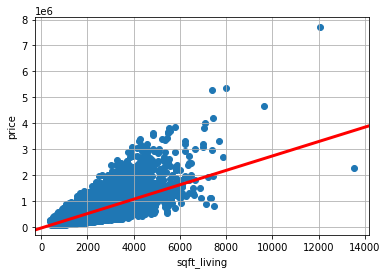

In [405]:
plot_model_on_data(X_train, y_train, rlu,"sqft_living","price")

Grafico del modello sui dati del validation set

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


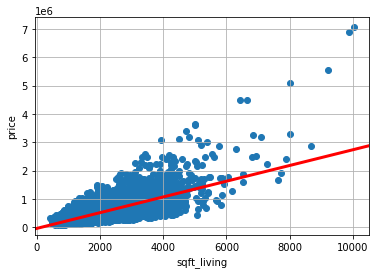

In [406]:
plot_model_on_data(X_val, y_val, rlu,"sqft_living","price")

Si può concludere che questo modello può essere un inizio per risolvere il problema ma non è assolutamente sufficiente per avere un risultato affidabile e funzionale. Quindi si procede con modelli più complessi ed esaustivi.

#Modello di regressione non lineare univariata

Anche se probabilmente non migliorerà sufficientemente il risultato finale rispetto al precedente si applica la regressione non lineare per permettere al modello di adattarsi ancora meglio ai dati. Adesso la formula d'errore è la seguente (prendendo in esempio un polinomio di terzo grado. $$ \mathbf{h}=\theta_0+\theta_1\cdot x+\theta_2\cdot x^2+\theta_3\cdot x^3 $$
$$ \mathrm{E} = \frac{1}{m}\sum_{i=1}^n\left(\mathbf{h(x_i)}-y_i\right)^2 $$
In questo modo si sta utilizzando la regressione non lineare che è una generalizzione di quella lineare. Nonostante ciò l'algoritmo rimane il medesimo di quello usato precedentemente perchè sui theta non c'è nessun esponente quindi


Si costruisce un polinomio di grado 15.

In [407]:
rnu = Pipeline([
    ("poly",   PolynomialFeatures(degree=15, include_bias=False)),    
    ("scale",  StandardScaler()),
    ("linreg", LinearRegression())
])
rnu.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=15, include_bias=False)),
                ('scale', StandardScaler()), ('linreg', LinearRegression())])

In [408]:
rnu.named_steps['linreg'].coef_

array([-1.56042586e+07,  3.02405723e+08, -3.81228112e+09,  4.37535889e+10,
       -4.14507057e+11,  2.93374728e+12, -1.51866666e+13,  5.75194479e+13,
       -1.59444991e+14,  3.21631678e+14, -4.65038521e+14,  4.67932764e+14,
       -3.10221785e+14,  1.21482250e+14, -2.12336457e+13])

Valutazione sul training set

In [409]:
print_eval(X_train, y_train, rnu)

   Mean squared error: 6.1203e+10
       Relative error: 30.16588%
R-squared coefficient: 0.54568


Valutazione sul validation set

In [410]:
print_eval(X_val, y_val, rnu)

   Mean squared error: 4.0304e+12
       Relative error: 30.42033%
R-squared coefficient: -28.874


Grafico del modello sui

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


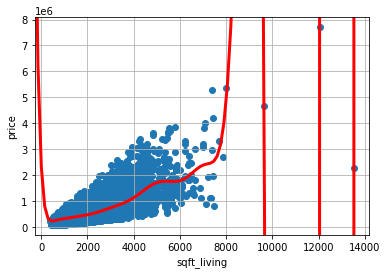

In [411]:
plot_model_on_data(X_train, y_train, rnu,"sqft_living","price")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


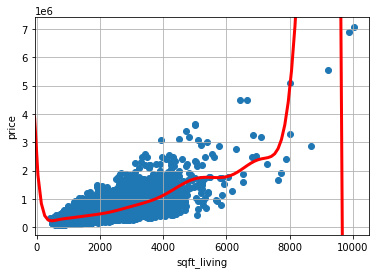

In [412]:
plot_model_on_data(X_val, y_val, rnu,"sqft_living","price")

Come si può notare dal grafico sono presenti forti oscillazioni che destabilizzano il modello e lo rendono inutilizzabili. Infatti anche se nel training set si ottiene un risultato migliore rispetto al modello lineare si osserva che sul validation set è molto inaccurato (coefficiente R^2)

**Regressione Ridge**

Per ridurre le oscillazioni del modello bisogna ricorrere alla regolarizzazione e che riduce il valore dei coefficienti thetha aggiugnendo alla funzione d'errore la minimizzazione dei theta, moltiplicati per un parametro lambda (**iperparametro**). In questo modo si dovrebbe raggiungere un miglior risultato nel validation set.

La **_regolarizzazione_** modifica la funzione d'errore su cui si basa l'addestramento, aggiungendo una penalità per valori estremi dei parametri del modello. Nella regolarizzazione _L2_ la penalità è proporzionale al quadrato della norma euclidea del vettore $\mathbf{\theta}$ dei parametri. In questo modo parametri molto alti in valore assoluto sono molto penalizzati.
- La regressione _ridge_ consiste nella regressione lineare con applicata la regolarizzazione L2, utilizzando quindi la seguente funzione d'errore:
$$ E = \left\Vert\mathbf{X}\mathbf{\theta}-\mathbf{y}\right\Vert_2^2 + \alpha\left\Vert\mathbf{\theta}\right\Vert_2^2 $$
- $\alpha$ è un parametro impostabile dall'utente che controlla il "peso" della regolarizzazione, si è scelto pari a 1

In [413]:
from sklearn.linear_model import Ridge
rrm = Pipeline([
    ("poly",   PolynomialFeatures(degree=15, include_bias=False)),
    ("scale",  StandardScaler()),
    ("linreg", Ridge(alpha=1))
])
rrm.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=15, include_bias=False)),
                ('scale', StandardScaler()), ('linreg', Ridge(alpha=1))])

In [414]:
rrm.named_steps['linreg'].coef_

array([ -16632.23856501,  228783.82754184,  300296.16998881,
       -353982.11341409, -232578.91709693,  134862.28260877,
        286901.3120341 ,  224025.59256597,   76427.44514501,
        -57483.32331983, -134597.26167908, -148664.14026265,
       -110377.74380892,  -35081.93955336,   62996.32356438])

I coefficienti sono stati molto ridotti e con essi anche le oscillazioni del modello

Grafico del modello sui dati del training set

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


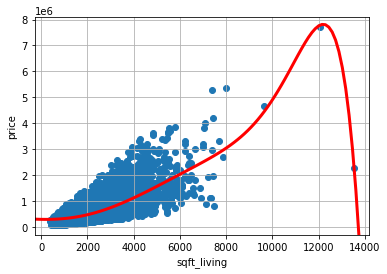

In [415]:
plot_model_on_data(X_train, y_train, rrm,"sqft_living","price")

Grafico del modello con i dati del validation set

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


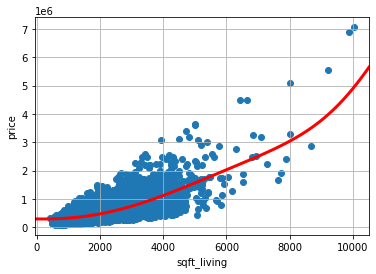

In [416]:
plot_model_on_data(X_val, y_val, rrm,"sqft_living","price")

Valutazione del training set

In [417]:
print_eval(X_train, y_train, rrm)

   Mean squared error: 6.2038e+10
       Relative error: 30.28012%
R-squared coefficient: 0.53948


Valutazione del validation set

In [418]:
print_eval(X_val, y_val, rrm)

   Mean squared error: 5.8854e+10
       Relative error: 30.45570%
R-squared coefficient: 0.56377


Come si può notare le oscillazioni sono state ridotte ed il risultato è migliorato nettamente infatti il modello approssima meglio i dati sul validation set ma l'errore rimane comunque alto. Per migliorare l'accuratezza bisogna adottare modelli migliori.

**Regressione Ridge - varianti di alpha** 

Di seguito si mostrano alcuni modelli di regressione ridge con iperparametri diversi da quelli provati precedentemente per vedere come variano i coefficienti.

*Modello Ridge (alpha = 100)*

In [419]:

rrm1 = Pipeline([
    ("poly",   PolynomialFeatures(degree=15, include_bias=False)),
    ("scale",  StandardScaler()),
    ("linreg", Ridge(alpha=100))
])
rrm1.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=15, include_bias=False)),
                ('scale', StandardScaler()), ('linreg', Ridge(alpha=100))])

Coefficienti del modello

In [420]:
rrm1.named_steps['linreg'].coef_

array([ 60510.99174761, 178537.60386917,  72858.94015733, -31822.56460853,
       -30789.33462756,   2583.6417194 ,  26013.84495008,  33197.88167316,
        28566.29618244,  17284.83172761,   2980.58055461, -12198.9573343 ,
       -27101.02588949, -41160.09555099, -54135.18184666])

Valutazione sul training set

In [421]:
print_eval(X_train, y_train, rrm1)

   Mean squared error: 6.2401e+10
       Relative error: 30.30053%
R-squared coefficient: 0.53679


Valutazione sul validation set

In [422]:
print_eval(X_val, y_val, rrm1)

   Mean squared error: 5.8341e+10
       Relative error: 30.39988%
R-squared coefficient: 0.56757


*Modello Ridge (alpha = 1000)*

In [423]:
rrm2 = Pipeline([
    ("poly",   PolynomialFeatures(degree=15, include_bias=False)),
    ("scale",  StandardScaler()),
    ("linreg", Ridge(alpha=1000))
])
rrm2.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=15, include_bias=False)),
                ('scale', StandardScaler()), ('linreg', Ridge(alpha=1000))])

Coefficienti del modello

In [424]:
rrm2.named_steps['linreg'].coef_

array([ 9.92732747e+04,  1.09492524e+05,  6.84340528e+04,  2.25739838e+04,
        4.16525392e+03,  5.28306503e+01, -8.50963896e+02, -2.00310868e+03,
       -3.90270749e+03, -6.31422318e+03, -8.94466290e+03, -1.15880573e+04,
       -1.41245954e+04, -1.64935277e+04, -1.86697660e+04])

Valutazione sul training set

In [425]:
print_eval(X_train, y_train, rrm2)

   Mean squared error: 6.2775e+10
       Relative error: 30.22639%
R-squared coefficient: 0.53401


Valutazione sul validation set

In [426]:
print_eval(X_val, y_val, rrm2)

   Mean squared error: 5.8369e+10
       Relative error: 30.31741%
R-squared coefficient: 0.56736


Nonostante i cambiamento del parametro alpha non si riscontra un grande cambiamento a parte la diminuzione dei coefficienti. Però questa tipologia di studio verrà ripresa più avanti con la Grid Search


#Modello di regressione lineare multivariata

In questa sezione si farà uso di più feature per raggiungere un modello più accurato dei precedenti.

Anche in questo caso si usa il metodo **Hold Out** per separare il dataset in training set e validation set. Questa volta bisognerà includere più feature tra le variabili X

In [427]:
print(dataset.columns)

#d1 = dataset.drop(columns = ["bedrooms","lat","sqft_basement","view","sqft_lot","condition","yr_built","long","sqft_lot15","yr_renovated","waterfront","floors"], inplace = False)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [428]:
y = dataset["price"]                  # y = price
X =  dataset.drop(columns=["price"], inplace = False)    # X = tutto tranne price, le feeature in totale sono 17 (si esclude price, zipcode, id, data)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=1/3, random_state=42)     
print(X.columns)
print(X.shape)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
(21596, 17)


**Regressione Lineare**

In [429]:
model_lin_multi = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", LinearRegression())
])
model_lin_multi.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('linreg', LinearRegression())])

Coefficienti del modello

In [430]:
sort_factors = abs(pd.Series(model_lin_multi.named_steps['linreg'].coef_, X_train.columns)) # consideriamo il modulol
sort_factors

bedrooms          30241.787087
bathrooms         35845.035419
sqft_living       74305.268361
sqft_lot           3927.575142
floors             1988.901358
waterfront        54307.565253
view              37108.377768
condition         21840.690424
grade            118097.713693
sqft_above        68073.368140
sqft_basement     27243.352292
yr_built          73451.358235
yr_renovated       8769.152623
lat               75205.656798
long              16518.213975
sqft_living15     25674.736331
sqft_lot15        12001.821795
dtype: float64

Valutazione sul training set

In [431]:
print_eval(X_train, y_train, model_lin_multi)

   Mean squared error: 4.0067e+10
       Relative error: 216.68995%
R-squared coefficient: 0.70258


Valutazione sul validation set

In [432]:
print_eval(X_val, y_val, model_lin_multi)

   Mean squared error: 4.2898e+10
       Relative error: 37.38039%
R-squared coefficient: 0.68204


Il modello cattura meglio i dati ma l'errore nel training set è alto.

**Regrassione Ridge**

In [462]:
model_ridge_lin_multi = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Ridge(alpha = 1000))
])
model_ridge_lin_multi.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('linreg', Ridge(alpha=1000))])

Coefficienti del modello

In [463]:
sort_factors = abs(pd.Series(model_ridge_lin_multi.named_steps['linreg'].coef_, X_train.columns)) # consideriamo il modulol
sort_factors

bedrooms          23901.739144
bathrooms         33891.178858
sqft_living       70962.205764
sqft_lot           3590.729993
floors             4259.250697
waterfront        51315.657234
view              38481.378124
condition         22097.798130
grade            104500.916344
sqft_above        64204.128654
sqft_basement     27526.151705
yr_built          63068.458258
yr_renovated      10859.507474
lat               72854.794840
long              18458.553182
sqft_living15     33281.186521
sqft_lot15         9986.017719
dtype: float64

Validazione sul training set

In [435]:
print_eval(X_train, y_train, model_ridge_lin_multi)

   Mean squared error: 4.0257e+10
       Relative error: 52.24710%
R-squared coefficient: 0.70117


Validazione sul validation set

In [436]:
print_eval(X_val, y_val, model_ridge_lin_multi)

   Mean squared error: 4.3288e+10
       Relative error: 31.83911%
R-squared coefficient: 0.67914


Il modello cattura meglio la variabilità dei dati ma l'errore è ancora molto elevato. Però se si aumenta alpha a 10000 l'errore relativo si dimezza.

**Regressione Ridge - alpha = 10000**

In [437]:
model_ridge_lin_multi_1 = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Ridge(alpha = 10000))
])
model_ridge_lin_multi_1.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('linreg', Ridge(alpha=10000))])

Coefficienti del modello

In [438]:
sort_factors = abs(pd.Series(model_ridge_lin_multi_1.named_steps['linreg'].coef_, X_train.columns)) # consideriamo il modulol
sort_factors

bedrooms           469.333422
bathrooms        30225.154387
sqft_living      54923.111230
sqft_lot          2335.961522
floors            9481.135734
waterfront       36515.903743
view             37586.058425
condition        16585.019150
grade            65178.585522
sqft_above       46845.896393
sqft_basement    26628.643907
yr_built         30273.002003
yr_renovated     13345.127608
lat              52287.628822
long             15678.198390
sqft_living15    40898.292520
sqft_lot15        2758.086336
dtype: float64

Come si può notare  i coefficienti sono diminuiti in valore

In [439]:
print_eval(X_train, y_train, model_ridge_lin_multi_1)

   Mean squared error: 4.5777e+10
       Relative error: 23.27300%
R-squared coefficient: 0.66019


Valutazione del validation set

In [440]:
print_eval(X_val, y_val, model_ridge_lin_multi_1)

   Mean squared error: 4.9345e+10
       Relative error: 24.74152%
R-squared coefficient: 0.63425


**Regressione Lasso**


-La regolarizzazione L2 impedisce che i parametri del modello assumano valori troppo alti
- I valori dei parametri sono comunque tutti non nulli, tutte le variabili vengono coinvolte nella predizione
- Vorremmo addestrare un modello meno complesso, dove alcuni parametri hanno valori nulli, **ignorando completamente le variabili meno rilevanti** ( ad es. variabili con valori dipendenti da altre -> _multicollinearità_)
- Questo si può ottenere tramite la regolarizzazione L1, basata sulla norma 1, definita su un vettore $\mathbf{x}$ di $n$ elementi come
$$ \left\Vert\mathbf{x}\right\Vert_1 = \sum_{i=1}^n{\left\vert x_i\right\vert} = \left\vert x_1\right\vert+\ldots+\left\vert x_n\right\vert $$

- La regressione _lasso_ consiste nella regressione lineare con regolarizzazione L1, basata quindi sul minimizzare la funzione d'errore
$$ E = \frac{1}{2m}\left\Vert\mathbf{X}\mathbf{\theta}-\mathbf{y}\right\Vert_2^2 + \alpha\left\Vert\mathbf{\theta}\right\Vert_1 $$
- Come per la regressione ridge, il parametro $\alpha$ controlla il peso della regolarizzazione
- La regressione lasso si esegue usando un modello `Lasso`, su cui possiamo impostare come in `Ridge` il parametro `alpha`

In [464]:
from sklearn.linear_model import Lasso
model_lasso_lin_multi = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Lasso(alpha=10000,max_iter=10000000))
])
model_lasso_lin_multi.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('linreg', Lasso(alpha=10000, max_iter=10000000))])

Coefficienti del modello

In [465]:
sort_factors = abs(pd.Series(model_lasso_lin_multi.named_steps['linreg'].coef_, X_train.columns)) # consideriamo il modulol
sort_factors

bedrooms           2569.822798
bathrooms         15584.564813
sqft_living      132980.031888
sqft_lot              0.000000
floors                0.000000
waterfront        48586.146445
view              37549.452775
condition         11441.201170
grade            120861.022724
sqft_above            0.000000
sqft_basement         0.000000
yr_built          58214.345108
yr_renovated       3579.789038
lat               70281.542938
long               8246.350508
sqft_living15     15937.715321
sqft_lot15            0.000000
dtype: float64

Come si può notare alcune variabili sono state azzerate completamente semplificando di poco il modello

Valutazione del modello sul traning set

In [466]:
print_eval(X_train, y_train, model_lasso_lin_multi)

   Mean squared error: 4.1345e+10
       Relative error: 31.29755%
R-squared coefficient: 0.69309


Valutazione del modello sul validation set

In [467]:
print_eval(X_val, y_val, model_lasso_lin_multi)

   Mean squared error: 4.4268e+10
       Relative error: 57.33361%
R-squared coefficient: 0.67188


Il modello ha un errore più alto rispetto ai modelli precedenti ma cattura la variabilità dei dati allo stesso modo. Quindi con meno feature riusciamo a raggiungere prestazioni simili su alcuni parametri.

#Elastic net

- La regressione _elastic net_ combina insieme le regolarizzazioni L2 e L1 usate in ridge e lasso
- L'errore è calcolato come:
$$ E = \underbrace{\frac{1}{2m} ||X\theta - y||_2 ^ 2}_{\text{errore sui dati}} + \underbrace{\alpha \rho ||\theta||_1}_{\text{L1}} + \underbrace{\frac{\alpha(1-\rho)}{2} ||\theta||_2 ^ 2}_{\text{L2}} $$
- I parametri impostabili sono
  - `alpha` ($\alpha$) che determina il peso generale della regolarizzazione
  - `l1_ratio` ($\rho$, compreso tra 0 e 1) che determina il peso di L1 relativo al totale (con $\rho=1$ si ha la regressione lasso, con $\rho=0$ la ridge)

In [481]:
from sklearn.linear_model import ElasticNet
model_elastic_lin_multi = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", ElasticNet(alpha=10, l1_ratio=0.9))
])
model_elastic_lin_multi.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('linreg', ElasticNet(alpha=10, l1_ratio=0.9))])

In [482]:
sort_factors = abs(pd.Series(model_elastic_lin_multi.named_steps['linreg'].coef_, X_train.columns)) # consideriamo il modulol
print(sort_factors)

bedrooms          3471.280675
bathrooms        29231.714828
sqft_living      50597.937921
sqft_lot          2268.433937
floors            9873.306496
waterfront       32440.629707
view             35349.924186
condition        14321.864182
grade            57717.736930
sqft_above       42653.213515
sqft_basement    25465.934101
yr_built         23978.988015
yr_renovated     12683.423180
lat              45618.284173
long             13451.406631
sqft_living15    39112.543121
sqft_lot15        1495.406888
dtype: float64


Valutazione del modello sul training set

In [483]:
print_eval(X_train, y_train, model_elastic_lin_multi)

   Mean squared error: 4.8782e+10
       Relative error: 23.14338%
R-squared coefficient: 0.63788


Valutazione del modello sul validation set

In [484]:
print_eval(X_val, y_val, model_elastic_lin_multi)

   Mean squared error: 5.2368e+10
       Relative error: 23.54411%
R-squared coefficient: 0.61184


L'utilizzo di questo modello a portato a score simili ad altri modelli visti in precedenza ma con un errore differente

#Regressione polinomiale multivariata

In presenza di più di una variabile, la regressione polinomiale genera tutti i possibili termini fino al grado impostato, includendo anche termini basati su più variabili. Aumentando il grado massimo, le variabili generate **aumentano rapidamente**.

Questa crescita è ancora più evidente con la matrice completa X_train, con 17 variabili ed un polinomio di grado 2

In [486]:
print(X_train.shape)

(14397, 17)


In [485]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(X_train).shape[1]

170

Il tempo per addestrare un modello polinomiale aumenta. Solo con un polinomio di grado 2 bisogna aspettare un'attesa considerevole.

In [489]:
model_elastic_pol_multi = Pipeline([
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),
    ("scale",  StandardScaler()),
    ("linreg", ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=10000))
])
%time model_elastic_pol_multi.fit(X_train, y_train)

CPU times: user 6.14 s, sys: 1.2 s, total: 7.34 s
Wall time: 3.79 s


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scale', StandardScaler()),
                ('linreg',
                 ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=10000))])

Valutazione del modello sul training set

In [490]:
print_eval(X_train, y_train, model_elastic_pol_multi)

   Mean squared error: 3.3716e+10
       Relative error: 23.77245%
R-squared coefficient: 0.74972


Gli score sono ottimistici

Valutazione del modello sul validation set

In [491]:
print_eval(X_val, y_val, model_elastic_pol_multi)

   Mean squared error: 3.4941e+10
       Relative error: 53.02096%
R-squared coefficient: 0.74101


Bisognerà agire sui parametri per abbassare l'errore ma è un buon punto di partenza considerando **R-squared coefficient**

## Regressione con Funzioni Kernel

Nella regressione polinomiale si eseguono prodotti tra dati con dimensioni aggiunte e rappresentate esplicitamente mentre le _funzioni kernel_ permettono di calcolare gli stessi prodotti senza calcolare esplicitamente le dimensioni aggiunte.
- Questo permette di ottenere modelli non lineari senza l'aggiunta di variabili
- Una delle funzioni kernel, la polinomiale è definita dalla formula
$$ K(\mathbf{a},\mathbf{b}) = \left(\mathbf{a}\cdot\mathbf{b}+c\right)^d $$
  - $d$ e $c$ sono parametri del kernel, in particolare $d$ è il grado del polinomio

In [502]:

model_kernel_pol_multi = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(alpha=200, kernel="poly", degree=15))
])
%time model_kernel_pol_multi.fit(X_train, y_train)


CPU times: user 1min 2s, sys: 1.57 s, total: 1min 3s
Wall time: 40.8 s


Pipeline(steps=[('scale', StandardScaler()),
                ('regr', KernelRidge(alpha=200, degree=5, kernel='poly'))])

In [503]:
print_eval(X_train, y_train, model_kernel_pol_multi)

   Mean squared error: 1.6458e+10
       Relative error: 16.02091%
R-squared coefficient: 0.87783


In [504]:
print_eval(X_val, y_val, model_kernel_pol_multi)

   Mean squared error: 6.4483e+10
       Relative error: 18.77017%
R-squared coefficient: 0.52204
